<a href="https://colab.research.google.com/github/VinodKothwal/EV-EDA/blob/main/credit_risk_dataset_MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files


uploaded = files.upload()

In [1]:
from google.colab import files


uploaded = files.upload()


Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['credit_risk_dataset.csv']))
print(df.head())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32414 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32414 non-null  int64  
 1   person_income               32414 non-null  int64  
 2   person_home_ownership       32414 non-null  object 
 3   person_emp_length           32414 non-null  float64
 4   loan_intent                 32414 non-null  object 
 5   loan_grade                  32414 non-null  object 
 6   loan_amnt                   32414 non-null  int64  
 7   loan_int_rate               32414 non-null  float64
 8   loan_status                 32414 non-null  int64  
 9   loan_percent_income         32414 non-null  float64
 10  cb_person_default_on_file   32414 non-null  object 
 11  cb_person_cred_hist_length  32414 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [9]:
df.person_emp_length.mean()

4.7905103238288556

In [10]:
df.person_emp_length.median()

4.0

In [14]:
df=df[df['person_emp_length']!=123.0]

<Axes: >

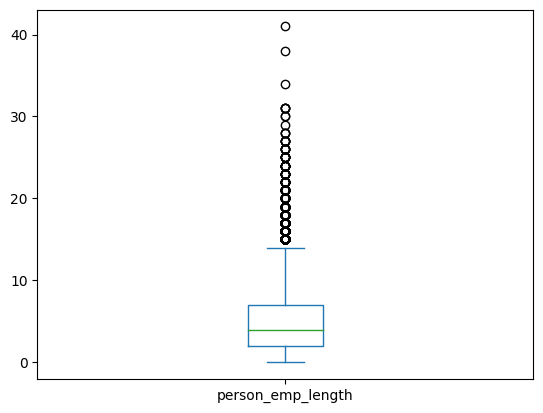

In [15]:
df.person_emp_length.plot(kind='box')

In [21]:
df.person_emp_length.mean()

4.761584500524465

In [22]:
df.person_emp_length.median()

4.0

In [20]:
df.person_emp_length.fillna(df.person_emp_length.median(),inplace=True)

In [26]:
df.loan_int_rate.mean(),df.loan_int_rate.median()

(11.014645523539212, 10.99)

In [25]:
df.loan_int_rate.fillna(df.loan_int_rate.median(),inplace=True)

In [28]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('cb_person_default_on_file',axis=1),df['cb_person_default_on_file'],test_size=0.25,random_state=85)

In [69]:
x_train_cat_col=x_train.select_dtypes(include=['object']).columns

In [70]:
x_train_noncat_col=x_train.select_dtypes(include=['int','float']).columns

In [71]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [72]:
from sklearn.pipeline import Pipeline,make_pipeline

In [73]:
pipe_cat=Pipeline(steps=[('OneHotEncoder',OneHotEncoder())])

In [74]:
pipe_noncat=Pipeline(steps=[('StandardScaler',StandardScaler())])

In [75]:
from sklearn.compose import ColumnTransformer

In [76]:
cl=ColumnTransformer([('Cat',pipe_cat,x_train_cat_col),('NonCat',pipe_noncat,x_train_noncat_col)])

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn=KNeighborsClassifier()

In [79]:
pipe1=make_pipeline(cl,knn)

In [80]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Cat',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder())]),
                                                  Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')),
                                                 ('NonCat',
                                                  Pipeline(steps=[('StandardScaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [81]:
x_test_predict=pipe1.predict(x_test)

In [82]:
x_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
8798,25,60000,MORTGAGE,10.0,PERSONAL,A,3600,5.99,0,0.06,3
24127,32,70000,MORTGAGE,7.0,PERSONAL,A,6000,5.42,0,0.09,6
4030,23,62000,RENT,3.0,PERSONAL,C,4000,10.59,0,0.06,3
1626,25,50500,RENT,0.0,MEDICAL,B,1500,11.89,0,0.03,3
9075,22,54000,RENT,4.0,EDUCATION,C,8000,13.48,1,0.15,3
...,...,...,...,...,...,...,...,...,...,...,...
13646,22,52128,RENT,6.0,VENTURE,A,13000,8.94,0,0.25,2
24389,27,72000,MORTGAGE,2.0,EDUCATION,B,2600,9.25,0,0.04,7
30545,40,63000,RENT,4.0,EDUCATION,C,7700,15.23,0,0.12,11
10065,23,65000,MORTGAGE,2.0,DEBTCONSOLIDATION,B,4400,11.36,0,0.07,4


In [83]:
df[(df['person_age']==31) & (df['person_income']==89000)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24811,31,89000,RENT,1.0,VENTURE,B,10000,10.99,0,0.11,N,9
25653,31,89000,MORTGAGE,15.0,EDUCATION,B,14000,10.65,0,0.16,N,10
25667,31,89000,MORTGAGE,8.0,PERSONAL,D,12250,15.05,0,0.14,N,8
28412,31,89000,RENT,1.0,MEDICAL,B,10000,10.99,0,0.11,N,5


#Accuracy score for KNN Model

In [105]:
knn_score=pipe1.score(x_test,y_test)

#Logistic Regression Model

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
llg=LogisticRegression()

In [88]:
pipe2=make_pipeline(cl,llg)

In [91]:
pipe2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Cat',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder())]),
                                                  Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')),
                                                 ('NonCat',
                                                  Pipeline(steps=[('StandardScaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [92]:
pipe2.predict(x_test)

array(['N', 'N', 'Y', ..., 'Y', 'N', 'Y'], dtype=object)

In [106]:
llg_score=pipe2.score(x_test,y_test)

In [96]:
!pip install svm

  Preparing metadata (setup.py) ... done
  Created wheel for svm: filename=svm-0.1.0-py3-none-any.whl size=3466 sha256=364d4542975256ae0e423edbfaffb5884e51c7da45d2406ca1219515124ec0fb
  Stored in directory: /root/.cache/pip/wheels/dc/0a/16/c3cfc069f00231db8d16bc70bc747c155395dbd30843a61957
Successfully built svm


In [107]:
from  sklearn.svm import SVC
sm=SVC()
pipe3=make_pipeline(cl,sm)
pipe3.fit(x_train,y_train)
pipe3.predict(x_test),
sm_score=pipe3.score(x_test,y_test)

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
pipe4=make_pipeline(cl,dtc)
pipe4.fit(x_train,y_train)
pipe4.predict(x_test),
dtc_score=pipe4.score(x_test,y_test)

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
pipe5=make_pipeline(cl,rfc)
pipe5.fit(x_train,y_train)
pipe5.predict(x_test),
rfc_score=pipe5.score(x_test,y_test)

In [108]:
li1=[knn_score,llg_score,sm_score,dtc_score,rfc_score]

In [109]:
li1

[0.8260118460019743,
 0.8231737413622903,
 0.8289733464955578,
 0.8209526159921027,
 0.823050345508391]

In [113]:
from matplotlib import pyplot as plt

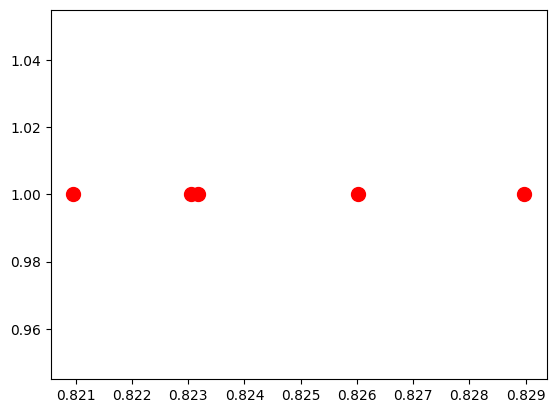

In [116]:
plt.plot(li1, [1] * len(li1), 'ro', markersize=10)

In [118]:
M_score=pd.DataFrame({'Model':['knn','Logisreg','svc','dtc','rfc'],'Score':li1})

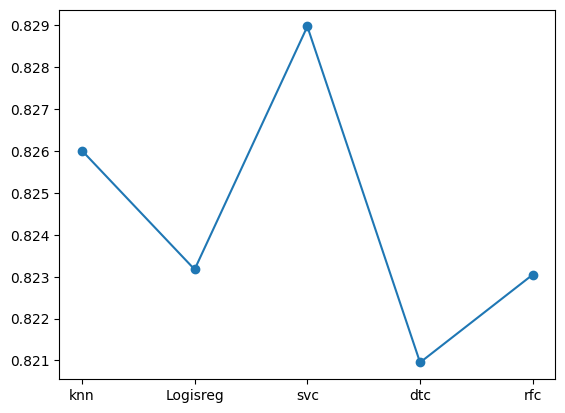

In [121]:
plt.plot(M_score['Model'], M_score['Score'], marker='o')
plt.show()